Deep Learning is a technology of which mimics a human brain in the sense that it consists of multiple neurons with multiple layers like a human brain. The network so formed consists of an input layer, an output layer, and one or more hidden layers. The network tries to learn from the data that is fed into it and then performs predictions accordingly. The most basic type of neural network is the ANN (Artificial Neural Network). The ANN does not have any special structure, it just comprises of multiple neural layers to be used for prediction.
Let’s build a model that predicts whether a person has heart disease or not by using ANN.

**About the data:**

In the dataset, we have 13 columns in which we are given different attributes such as sex, age, cholesterol level, etc. and we are given a target column which tells us whether that person has heart disease or not. We will keep all the columns as independent variables other than the target column because it will be our dependent variable. We will build an ANN which will predict whether a person has heart disease or not given other attributes of the person.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
X = data.iloc[:,:13].values
y = data["target"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

# **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **The Dense Layer**

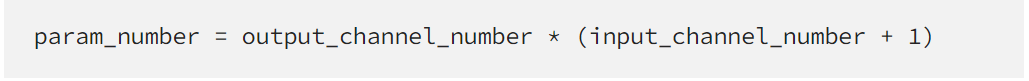

In [ ]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
					units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14,
					kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
					kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
				metrics = ['accuracy'] )


In [ ]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 )

Epoch 1/100
27/27 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5566
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.6745
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.8019
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.8632
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5424 - accuracy: 0.8538
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8585
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8679
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8679
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8679
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8726
Epoch 11/

In [ ]:
y_pred = classifier.predict(X_test)


3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred = (y_pred > 0.5)


In [ ]:
np.mean(y_test == y_pred)

0.5016302378939742

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[37,  7],
       [ 4, 43]])

In [ ]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

87.91208791208791


In [ ]:
# Accuracy = (True positives + True Negatives)/ (True positives + True negatives + False positives + False negatives)
